<a href="https://colab.research.google.com/github/cyberpunk-newman/Master/blob/main/BS6204/lec9_car_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
col_frames = os.listdir("/content/drive/MyDrive/BS6204/Lec9/frames")
# 2 ways to sort
col_frames.sort(key=lambda x:int(x.split('.')[0]))
col_frames.sort(key=lambda x:int(x[:-4]))
col_frames

['0.png',
 '1.png',
 '2.png',
 '3.png',
 '7.png',
 '8.png',
 '9.png',
 '13.png',
 '14.png',
 '15.png',
 '19.png',
 '20.png',
 '21.png',
 '25.png',
 '26.png',
 '27.png',
 '31.png',
 '32.png',
 '33.png',
 '37.png',
 '38.png',
 '39.png',
 '43.png',
 '44.png',
 '48.png',
 '49.png',
 '50.png',
 '51.png',
 '55.png',
 '56.png',
 '57.png',
 '61.png',
 '62.png',
 '63.png',
 '67.png',
 '68.png',
 '72.png',
 '73.png',
 '74.png',
 '78.png',
 '79.png',
 '80.png',
 '81.png',
 '85.png',
 '86.png',
 '87.png',
 '91.png',
 '92.png',
 '96.png',
 '97.png',
 '98.png',
 '102.png',
 '103.png',
 '104.png',
 '105.png',
 '109.png',
 '110.png',
 '114.png',
 '115.png',
 '116.png',
 '120.png',
 '121.png',
 '122.png',
 '123.png',
 '127.png',
 '128.png',
 '132.png',
 '133.png',
 '134.png',
 '135.png',
 '139.png',
 '140.png',
 '141.png',
 '145.png',
 '146.png',
 '150.png',
 '151.png',
 '152.png',
 '156.png',
 '157.png',
 '158.png',
 '162.png',
 '163.png',
 '164.png',
 '168.png',
 '169.png',
 '170.png',
 '171.png',
 '

In [ ]:
# create empty lsit t store frames
col_images=[]

for frame in col_frames:
  #read frames
  temp_img=cv2.imread("/content/drive/MyDrive/BS6204/Lec9/frames/"+frame)
  col_images.append(temp_img)

In [ ]:
col_images[0].shape

(144, 256, 3)

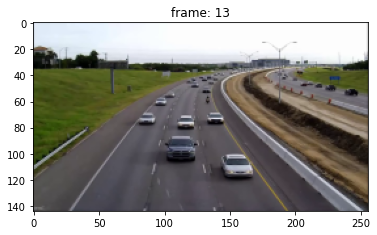

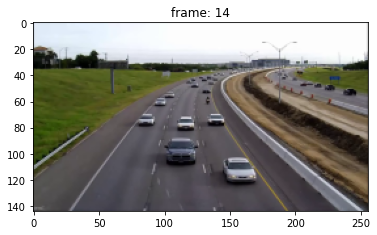

In [ ]:
i = 13
for frame in [i,i+1]:
  plt.imshow(cv2.cvtColor(col_images[frame],cv2.COLOR_BGR2RGB))
  plt.title("frame: "+ str(frame))
  plt.show()

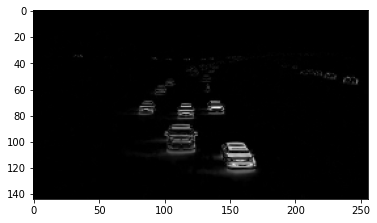

In [ ]:
# convert frames to grayscale
grayA = cv2.cvtColor(col_images[i],cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(col_images[i+1],cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.absdiff(grayB,grayA),cmap='gray')
plt.show()

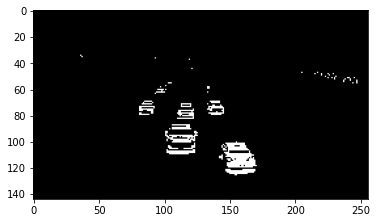

In [ ]:
diff_image = cv2.absdiff(grayB,grayA)

# perform image thresholding
ret,thresh = cv2.threshold(diff_image,30,255,cv2.THRESH_BINARY)

#plot iamge after thresholidng
plt.imshow(thresh,cmap='gray')
plt.show()

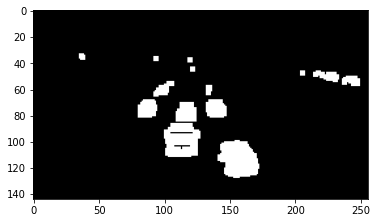

In [ ]:
#perfor,image dilation
kernel = np.ones((4,4),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations=1)

plt.imshow(dilated,cmap='gray')
plt.show()

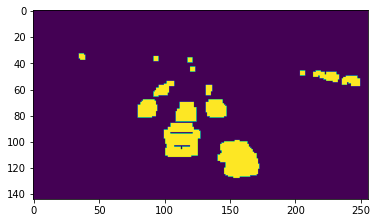

In [ ]:
plt.imshow(dilated)
cv2.line(dilated,(0,80),(256,80),(200,0,0))
plt.show()

In [ ]:
contours,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)



In [ ]:
valid_cntrs=[]

for index,cntr in enumerate(contours):
  x,y,w,h = cv2.boundingRect(cntr)
  if (x<=200)&(y>=80)&(cv2.contourArea(cntr)>=25):
    if(y>=90)&(cv2.contourArea(cntr)<40):
      break
    valid_cntrs.append(cntr)

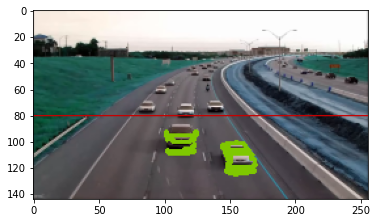

In [ ]:
dmy = col_images[13].copy()

cv2.drawContours(dmy,valid_cntrs,-1,(127,200,0),2)
cv2.line(dmy,(0,80),(256,80),(200,0,0))
plt.imshow(dmy)
plt.show()

In [ ]:
#font style
font = cv2.FONT_HERSHEY_SIMPLEX
pathIn = '/content/drive/MyDrive/BS6204/Lec9/contour_frames/'
for i in range(len(col_images)-1):
  grayA = cv2.cvtColor(col_images[i],cv2.COLOR_BGR2GRAY)
  grayB = cv2.cvtColor(col_images[i+1],cv2.COLOR_BGR2GRAY) 

  diff_image = cv2.absdiff(grayB,grayA)

  # perform image thresholding
  ret,thresh = cv2.threshold(diff_image,30,255,cv2.THRESH_BINARY)
  dilated = cv2.dilate(thresh,kernel,iterations=1)

  contours,hierachy = cv2.findContours(dilated.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

  valid_cntrs=[]

  for index,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if (x<=200)&(y>=80)&(cv2.contourArea(cntr)>=25):
      if(y>=90)&(cv2.contourArea(cntr)<40):
        break
      valid_cntrs.append(cntr)

  dmy = col_images[i].copy()

  cv2.drawContours(dmy,valid_cntrs,-1,(127,200,0),2)
  cv2.putText(dmy,"vehicles detected: "+str(len(valid_cntrs)),(55,15),font,0.6,(0,100,0),2)
  cv2.line(dmy,(0,80),(256,80),(100,255,255))

  cv2.imwrite(pathIn+str(i)+'.png',dmy)



In [ ]:
pathOut = '/content/drive/MyDrive/BS6204/Lec9/vehicle_detection.mp4'

fps=14.0

In [ ]:
frames_array=[]

pathIn = '/content/drive/MyDrive/BS6204/Lec9/contour_frames/'

contour_images = os.listdir(pathIn)
contour_images.sort(key = lambda x: int(x[:-4]))

for i in range(len(contour_images)):
  filename=pathIn+contour_images[i]

  # read frmaes
  temp_img = cv2.imread(filename)
  frames_array.append(temp_img)

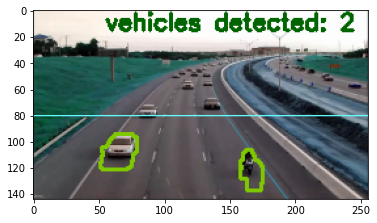

In [ ]:
plt.imshow(frames_array[48])

In [ ]:
print(pathOut)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter(pathOut,fourcc, fourcc,fps , (256,144))
# out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX',fps,(256,144)) )

for i in range(len(frames_array)):
  out.write(frames_array[i])

out.release()

/content/drive/MyDrive/BS6204/Lec9/vehicle_detection.mp4
